In [5]:
import numpy as np
from matplotlib import pyplot as plt, colors
from astropy.io import fits
import scipy.optimize as fit
from astropy.table import Table
import math
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

In [6]:
# Our task is to replicate the Hertzsprung-Russel diagram using data gathered from
# the 3rd Data Release of the Gaia space telescope.

# Working with only the BP-RP color and Absolute Magnitude of stars from the Gaia database,
# we will estimate the relationship between these data and effective surface
# temperature and luminosity in order to make a plot with 4 axes.

# First, we load in the file "gaia4_8_15-results.fits" using the astropy and pandas packages.
# This data was quereyed to give 110,000 stars with a parallax over parallax error >= 5
# and located 20 degrees above the galactic plane.

# Now turn the data into a pandas dataframe.

data = Table.read('gaia4_8_15-result.fits', format='fits')
df = data.to_pandas()
df

,teff_gspphot,lum_flame,random_index,bp_rp,distance_gspphot,mg_gspphot
0,2829.354248,0.001522,1320081859,3.804580,1.301100,13.3372
1,3099.633545,0.003398,1329945144,2.833697,1.827500,11.8014
2,3511.044922,0.023885,970765473,2.215609,2.545300,9.5030
3,3117.375977,0.004220,249919922,2.834036,2.976200,11.6784
4,5002.043457,0.339707,564182683,1.140298,3.217900,5.9203
...,...,...,...,...,...,...
109323,5454.858887,2.170328,1621933212,0.923433,99.998398,3.8573
109324,3190.884033,0.005147,1338395813,3.091102,99.999001,11.3643
109325,3398.098145,0.015128,690139787,2.729296,99.999100,10.0537
109326,3806.747070,0.056756,773149836,2.124908,99.999802,8.4094


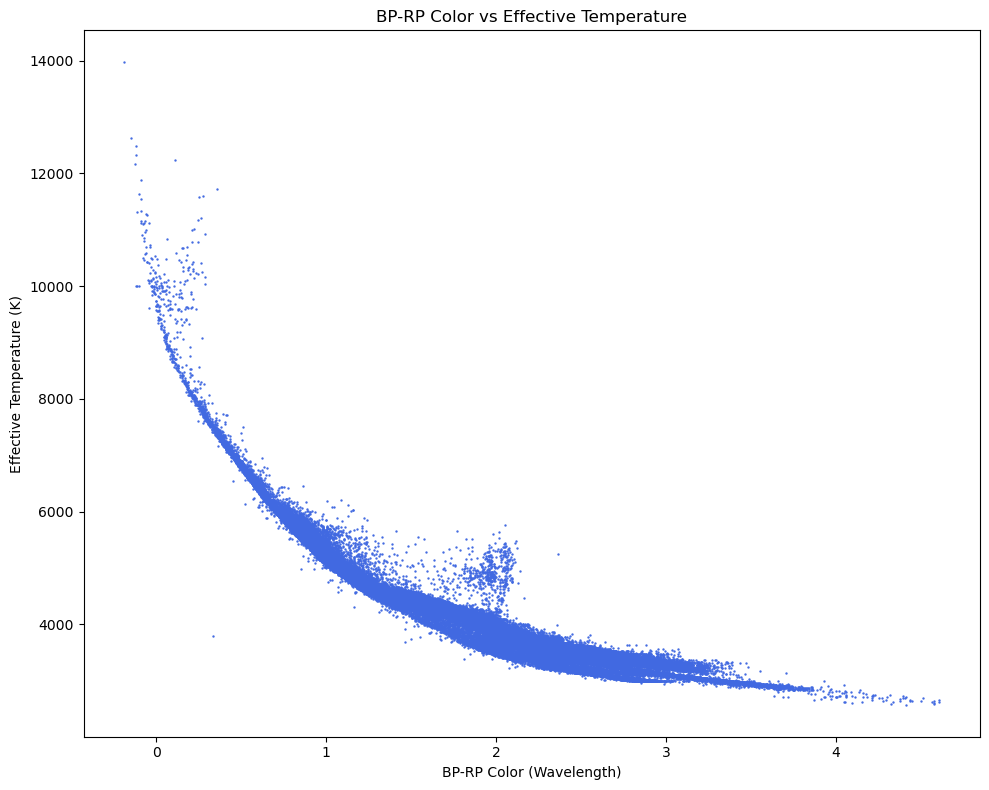

In [7]:
# We first neet to estimate the relationship between BP-RP photometric results and
# the effective surface temperature of a star in order to plot both x axes in the diagram.

fig, axs = plt.subplots(figsize=(10,8))

axs.scatter(x=df['bp_rp'], y=df['teff_gspphot'], s=0.5, c='royalblue')

axs.set_xlabel('BP-RP Color (Wavelength)')
axs.set_ylabel('Effective Temperature (K)')
axs.set_title('BP-RP Color vs Effective Temperature')

plt.tight_layout()
plt.show()

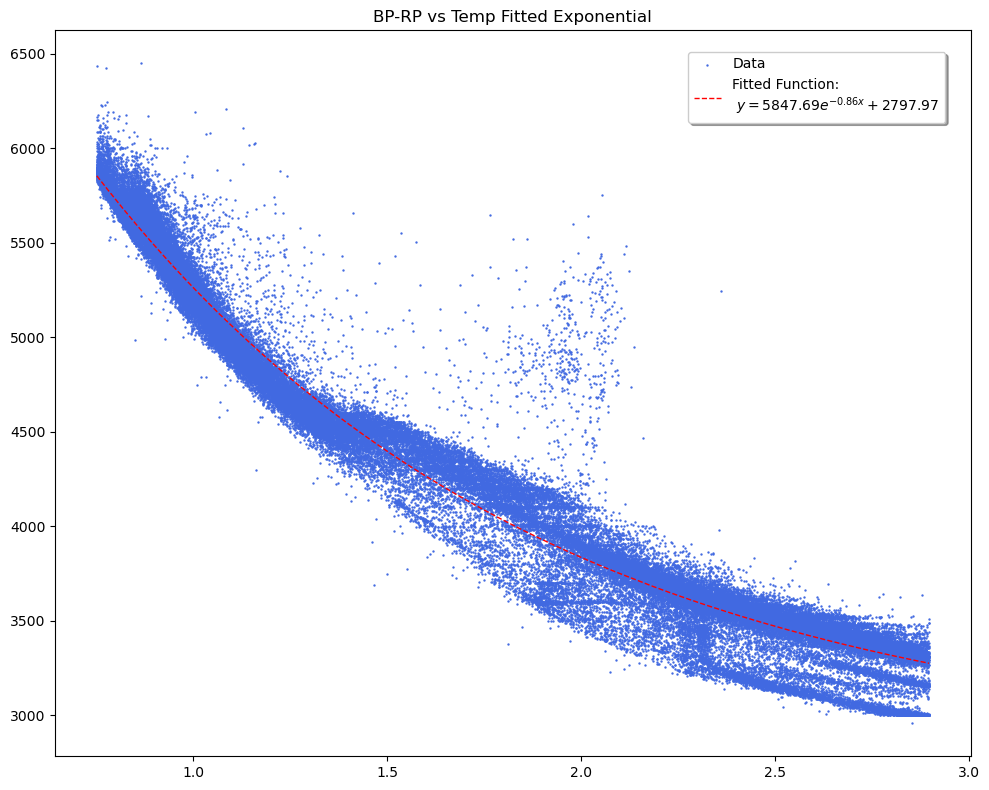

In [8]:
# We visually note that the relationship is of a negative exponential.
# However, notice that the majority of the data is concentrated near the center of the graph.
# Let us eliminate the first and last 10,000 points so we can fit a negative
# exponential equation along the central 90,000 points.

# Organize the dataframe by their BP-RP color value
dfsorted1 = df.sort_values(by=['bp_rp'])

# Take only the central 90,000 points
x = np.array(dfsorted1['bp_rp'][10000:100000])
y = np.array(dfsorted1['teff_gspphot'][10000:100000])

# Define an exponential function
def expfit(x, a, b, c):
    return a * np.exp(b * x) + c

# Perform the fit with an initial guess
p0 = [5000, -1, 3000]
params, cv = fit.curve_fit(expfit, x, y, p0)
a, b, c = params

# Plot the results
fig, axs = plt.subplots(figsize=(10,8))

axs.scatter(x, y, s=0.5, label='Data', c='royalblue')

axs.plot(x, expfit(x, a, b, c), 'r--', lw=1,
         label='Fitted Function:\n $y = %0.2f e^{%0.2f x} + %0.2f$' % (a, b, c))

axs.legend(bbox_to_anchor=(0.98, 0.98), fancybox=True, shadow=True)
axs.set_title("BP-RP vs Temp Fitted Exponential")

plt.tight_layout()
plt.show()

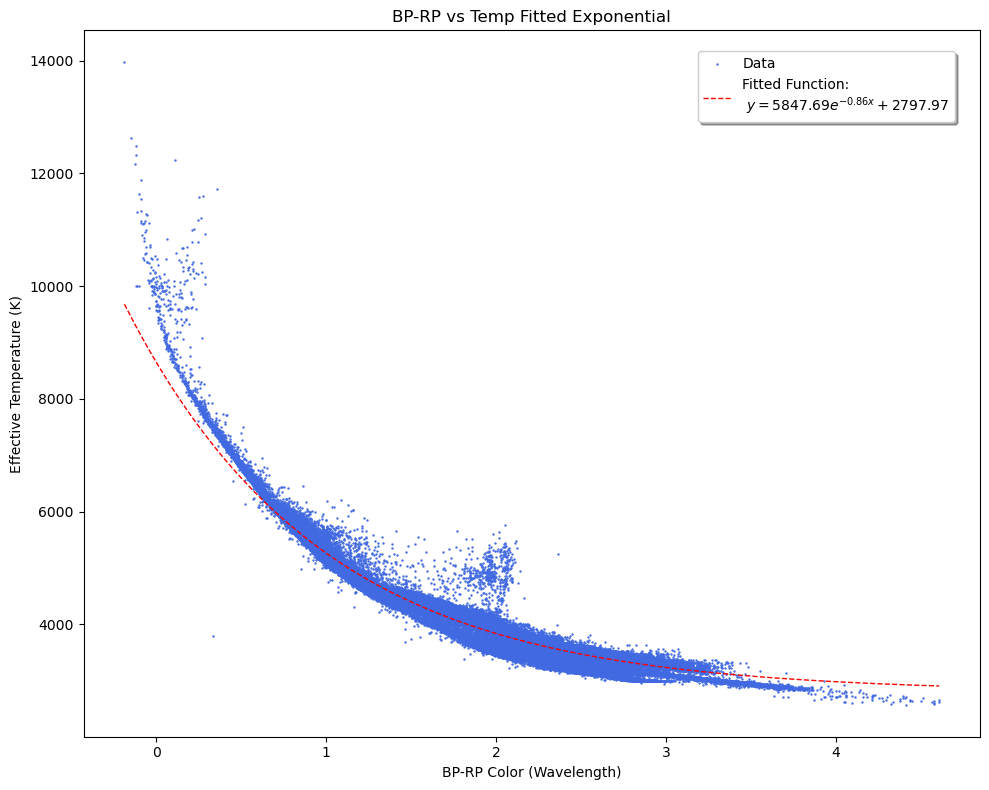

In [9]:
# Let's check this fit against the entire data set

x = np.array(dfsorted1['bp_rp'])
y = np.array(dfsorted1['teff_gspphot'])

fig, axs = plt.subplots(figsize=(10,8))

axs.scatter(x, y, s=0.5, label='Data', c='royalblue')

axs.plot(x, expfit(x, a, b, c), 'r--', lw=1,
         label='Fitted Function:\n $y = %0.2f e^{%0.2f x} + %0.2f$' % (a, b, c))

axs.legend(bbox_to_anchor=(0.98, 0.98), fancybox=True, shadow=True)
axs.set_xlabel('BP-RP Color (Wavelength)')
axs.set_ylabel('Effective Temperature (K)')
axs.set_title("BP-RP vs Temp Fitted Exponential")

plt.tight_layout()
plt.show()

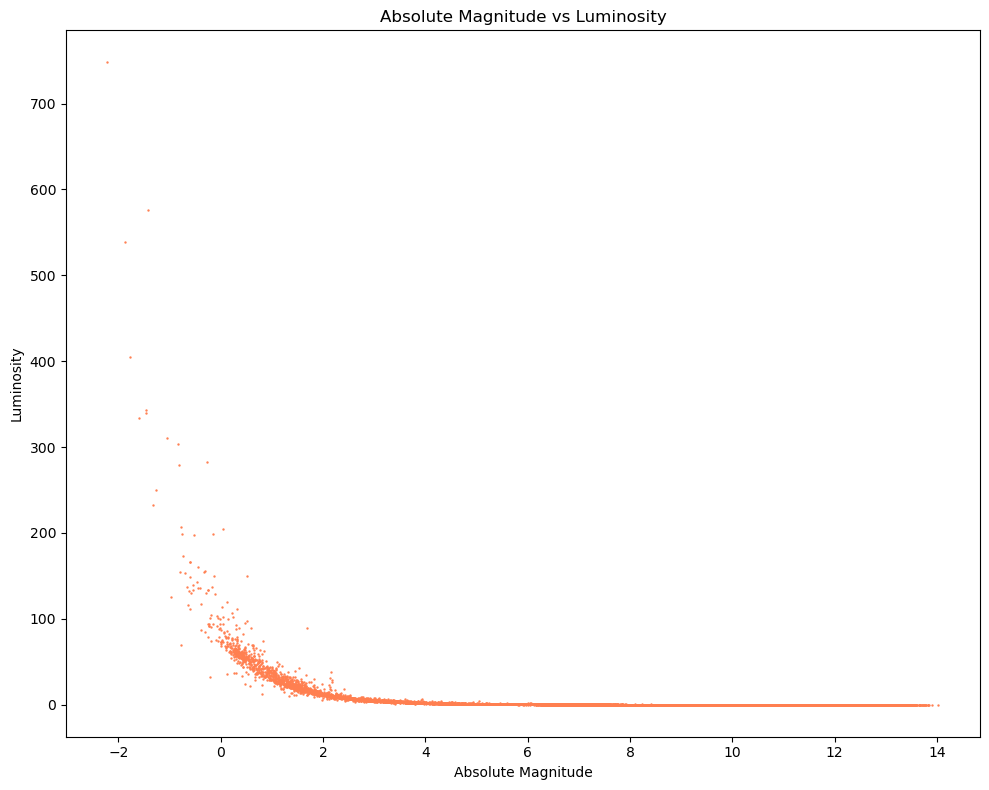

In [10]:
# Now let's do the same thing to find the relationship between absolute magnitude and luminosity.

fig, axs = plt.subplots(figsize=(10,8))

axs.scatter(x=df['mg_gspphot'], y=df['lum_flame'], s=0.5, c='coral')

axs.set_xlabel('Absolute Magnitude')
axs.set_ylabel('Luminosity')
axs.set_title('Absolute Magnitude vs Luminosity')

plt.tight_layout()
plt.show()

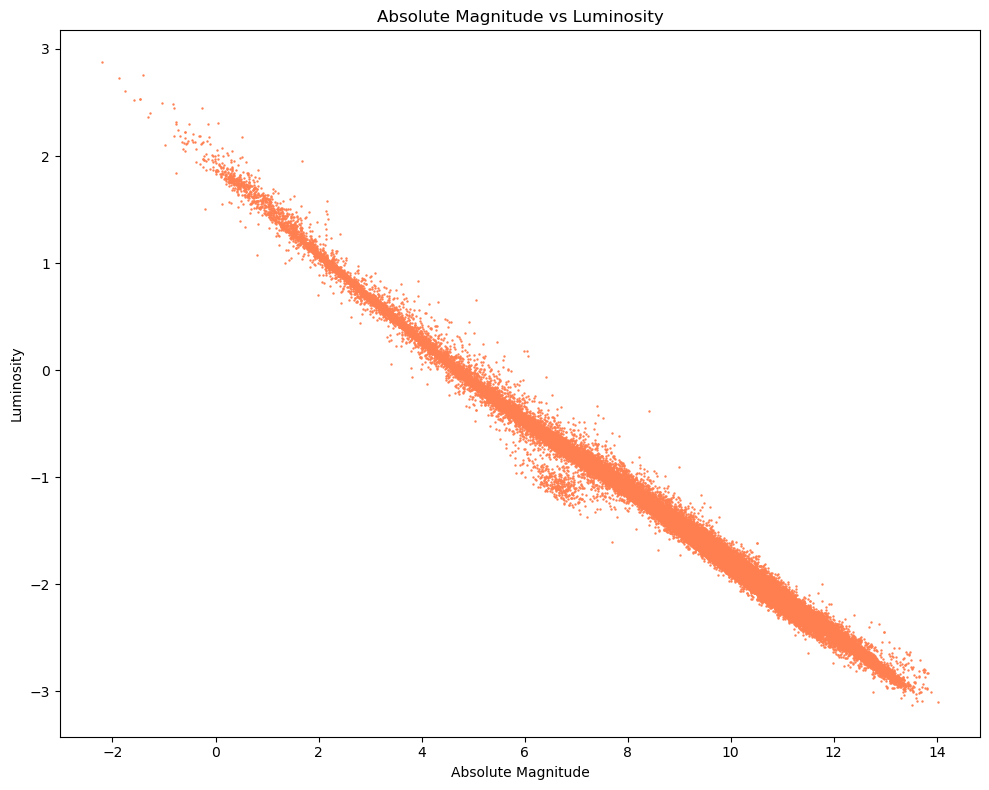

In [11]:
# But, the HR Diagram plots the logarithm of luminosity, so we need to take the
# log of all luminosity values before we make a fit.

fig, axs = plt.subplots(figsize=(10,8))

axs.scatter(x=df['mg_gspphot'], y=np.log10(df['lum_flame']), s=0.5, c='coral')

axs.set_xlabel('Absolute Magnitude')
axs.set_ylabel('Luminosity')
axs.set_title('Absolute Magnitude vs Luminosity')

plt.tight_layout()
plt.show()

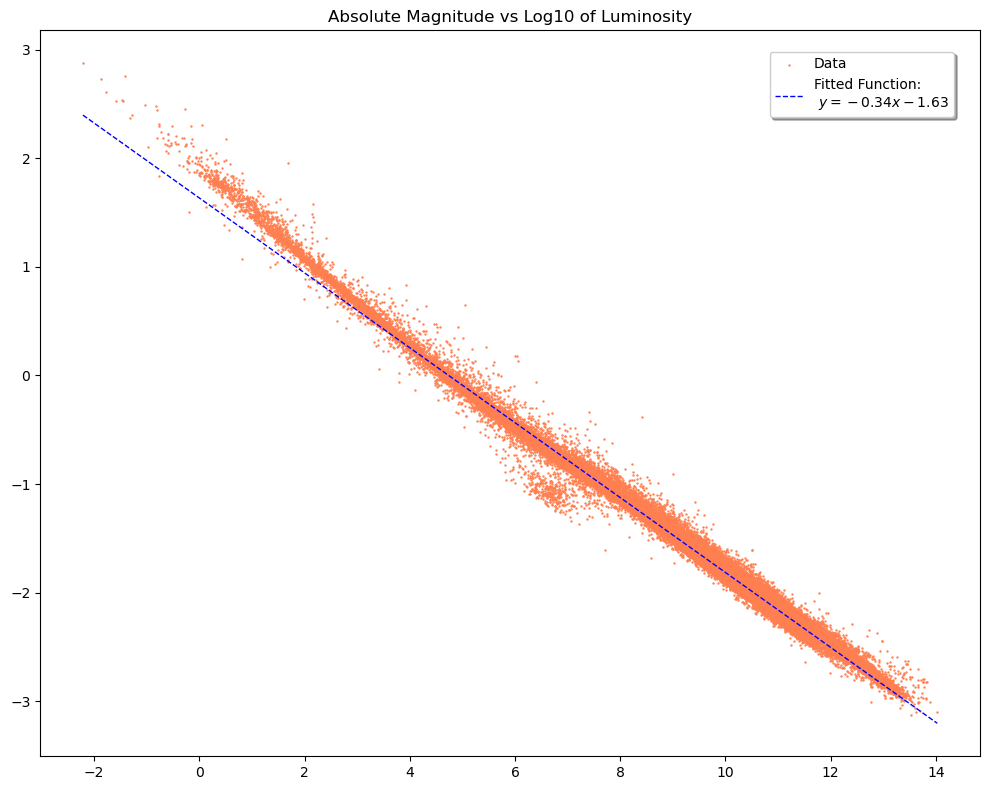

In [12]:
# Notice the linearity of the data. Let us try to fit a linear function.

# Sort the data by Absolute Magnitude
dfsorted2 = df.sort_values(by=['mg_gspphot'])

x = np.array(dfsorted2['mg_gspphot'])
y = np.log10(np.array(dfsorted2['lum_flame'])) # Take the log

# Define a linear function
def linfit(x, d, f):
    return d * x + f

# Perform the fit with an initial guess
p0 = [1, 1]
params, cv = fit.curve_fit(linfit, x, y, p0)
d, f = params

# Plot the results
fig, axs = plt.subplots(figsize=(10,8))

axs.scatter(x, y, s=0.5, label='Data', c='coral')

axs.plot(x, linfit(x, d, f), 'b--', lw=1,
         label='Fitted Function:\n $y = %0.2fx -%0.2f$' % (d, f))

axs.legend(bbox_to_anchor=(0.98, 0.98), fancybox=True, shadow=True)
axs.set_title("Absolute Magnitude vs Log10 of Luminosity")

plt.tight_layout()
plt.show()

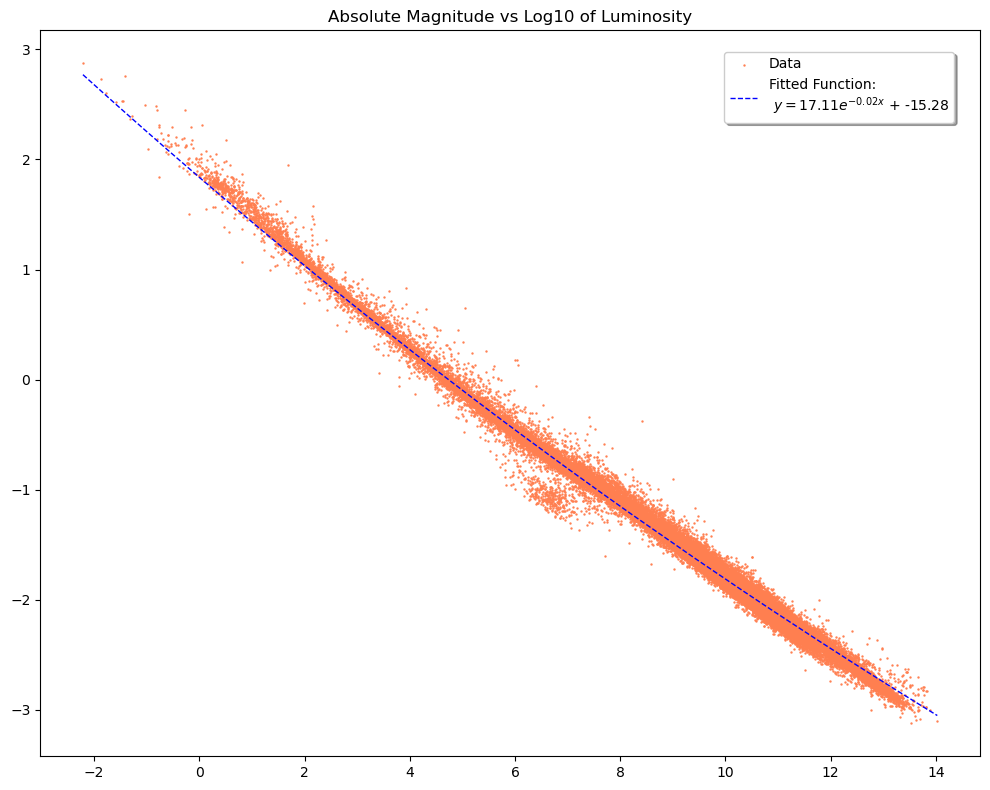

In [13]:
# However, the line diverges slightly. Let us try using an exponential again.

dfsorted2 = df.sort_values(by=['mg_gspphot'])

x = np.array(dfsorted2['mg_gspphot'])
y = np.log10(np.array(dfsorted2['lum_flame']))

def expfit(x, d, f, g):
    return d * np.exp(-f*x) + g

p0 = [1, 1, 1]
params, cv = fit.curve_fit(expfit, x, y, p0)
d, f, g = params

fig, axs = plt.subplots(figsize=(10,8))
axs.scatter(x, y, s=0.5, label='Data', c='coral')

axs.plot(x, expfit(x, d, f, g), 'b--', lw=1,
         label='Fitted Function:\n $y = %0.2f e^{-%0.2fx}$ + %0.2f' % (d, f, g))

axs.legend(bbox_to_anchor=(0.98, 0.98), fancybox=True, shadow=True)
axs.set_title("Absolute Magnitude vs Log10 of Luminosity")

plt.tight_layout()
plt.show()

In [14]:
# That looks a little better. Now let's turn all these values into floats.

a = float(a)
b = float(b)
c = float(c)
d = float(d)
f = float(f)
g = float(g)

print(a, b, c, d, f, g)

5847.685826228653 -0.8643512095459005 2797.967121753618 17.114970384038322 0.023996333136311315 -15.276915211371671


In [15]:
# In order to plot data with multiple axes, we need to define functions that determine
# the relationship between each value along the axes. With the values we just found,
# we can write these functions and their inverses.

# Here we define what temperature a color value gives
def bprptotemp(x):
    return a * np.exp(b*(x)) + c

# and then we define what color a temperature value gives
def temptobprp(x):
    return (1/b) * np.log((x-c)/a)

# Then we do the same for magnitude and luminosity
def magtolum(x):
    return d * np.exp(-f*(x)) + g

def lumtomag(x):
    return (-1/f) * np.log((x-g)/d)

/var/folders/fj/tq__v3797msfknfx8_l1h74r0000gn/T/ipykernel_31934/1955086071.py:11: RuntimeWarning: invalid value encountered in log
  return (1/b) * np.log((x-c)/a)


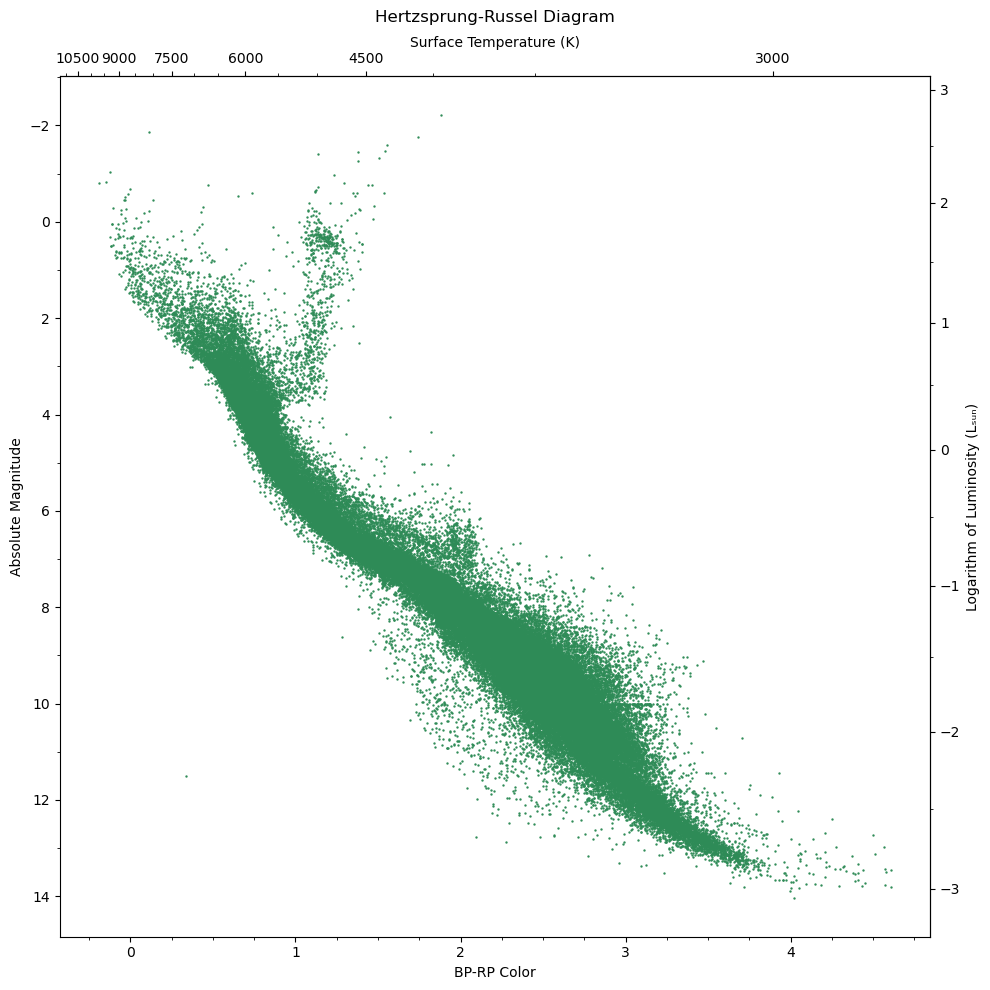

In [16]:
# Now let us test what our graph looks like. Making the plot is fairly simple.

fig, axs = plt.subplots(figsize=(10,10))

axs.scatter(x=df['bp_rp'], y=df['mg_gspphot'], s=0.5, c='seagreen')

axs.set_xlabel('BP-RP Color')
# Let us define the major and minor tick marks along the axes too.
axs.xaxis.set_ticks(np.arange(0, 5, 1))
axs.xaxis.set_minor_locator(MultipleLocator(0.25))

axs.set_ylabel('Absolute Magnitude')
axs.yaxis.set_ticks(np.arange(-2, 15, 2))
axs.yaxis.set_minor_locator(MultipleLocator(1))
axs.invert_yaxis()

# Now, we use the functions we made before to make secondary axes.
tempax = axs.secondary_xaxis('top', functions=(bprptotemp, temptobprp))
tempax.set_xlabel('Surface Temperature (K)')
tempax.xaxis.set_major_locator(MultipleLocator(1500))
tempax.xaxis.set_minor_locator(MultipleLocator(500))

lumax = axs.secondary_yaxis('right', functions=(magtolum, lumtomag))
lumax.set_ylabel('Logarithm of Luminosity (L\u209B\u1D64\u2099)')
lumax.yaxis.set_minor_locator(MultipleLocator(0.5))

axs.set_title('Hertzsprung-Russel Diagram', pad=10)

plt.tight_layout()
plt.show()

/var/folders/fj/tq__v3797msfknfx8_l1h74r0000gn/T/ipykernel_31934/1955086071.py:11: RuntimeWarning: invalid value encountered in log
  return (1/b) * np.log((x-c)/a)


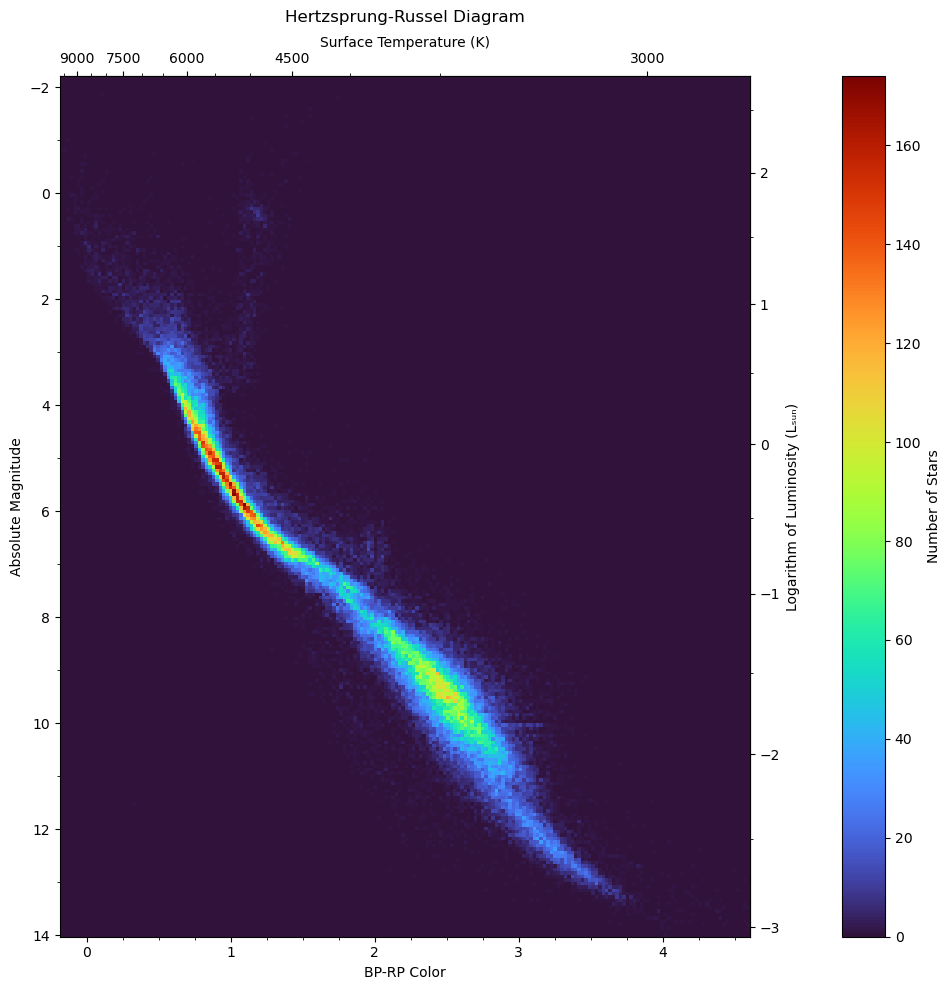

In [17]:
# The warning we are receiving is because, in the functions we defined, we are getting
# some values that result in negative numbers inside a logarithm. However, this is
# sort of irrelevant as this is only a problem for the cases where the temperatyre is less
# than 'c', and this is only the case for a couple points. Also, this does not affect
# the visualization of the plot, so it doesn't really matter.

# While we can see that there is a clear relationship between all of these
# parameters in the plot, it might be helpful if we knew where the points land
# the most. Therefore, let us plot a 2D Histogram with everything we have so far.

x = df['bp_rp']
y = df['mg_gspphot']
 
fig, axs = plt.subplots(figsize=(10,10))

hist = axs.hist2d(x, y, bins=(200, 250), cmap='turbo')

axs.set_xlabel('BP-RP Color')
axs.xaxis.set_ticks(np.arange(0, 5, 1))
axs.xaxis.set_minor_locator(MultipleLocator(0.25))

axs.set_ylabel('Absolute Magnitude')
axs.yaxis.set_ticks(np.arange(-2, 15, 2))
axs.yaxis.set_minor_locator(MultipleLocator(1))
axs.invert_yaxis()

tempax = axs.secondary_xaxis('top', functions=(bprptotemp, temptobprp))
tempax.set_xlabel('Surface Temperature (K)')
tempax.xaxis.set_major_locator(MultipleLocator(1500))
tempax.xaxis.set_minor_locator(MultipleLocator(500))

lumax = axs.secondary_yaxis('right', functions=(magtolum, lumtomag))
lumax.set_ylabel('Logarithm of Luminosity (L\u209B\u1D64\u2099)')
lumax.yaxis.set_minor_locator(MultipleLocator(0.5))

# For the histogram, let us make a colorbar to visualize the density of points
cb = fig.colorbar(hist[3], ax=axs, location='right', pad=0.1)
cb.set_label('Number of Stars')

axs.set_title('Hertzsprung-Russel Diagram', pad=10)

plt.tight_layout()
plt.show()

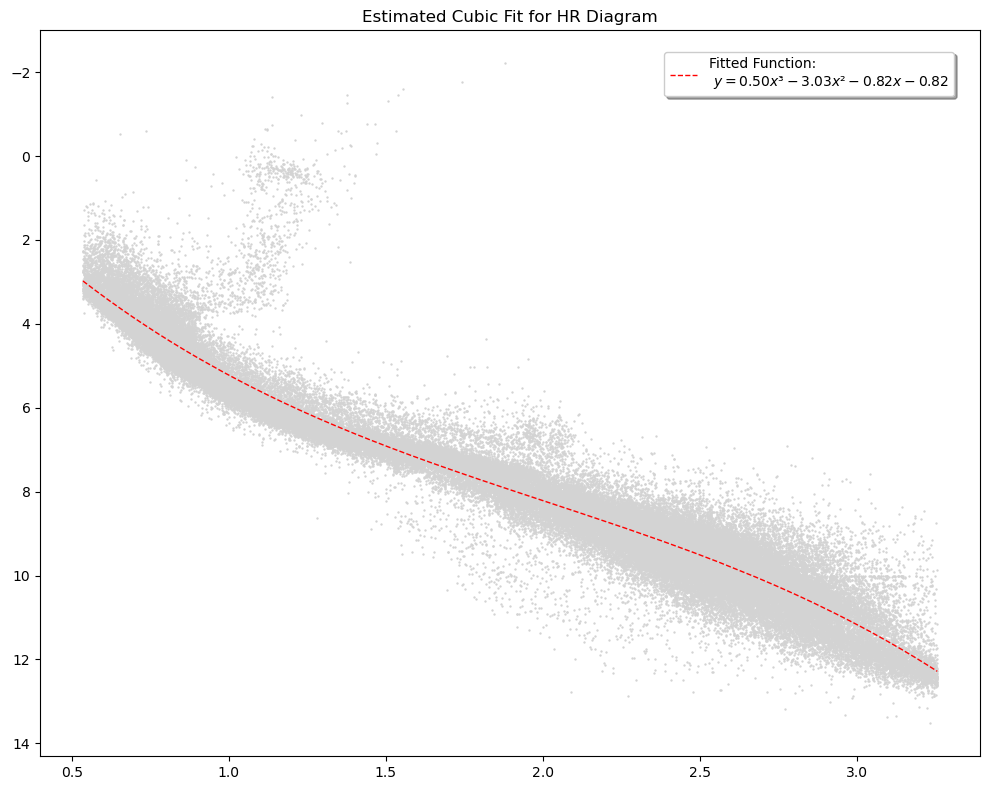

In [18]:
# Now that we know where most of the data lie, let us fit a line to the plot.
# Ignoring the left and right 2,000 points, we see that for the plot of
# BP-RP color against Absolute Magnitude, there is a sort of cubic
# relationship. Therefore, let us fit a cubic function.

dfsort3 = df.sort_values(by=['bp_rp'])

x = np.array(dfsort3['bp_rp'][2000:107000])
y = np.array(dfsort3['mg_gspphot'][2000:107000])

def cubefit(x, h, i, j, k):
    return h*(x**3) + i*(x**2) + j*x + k

p0 = [1, 1, 1, 1]
params, cv = fit.curve_fit(cubefit, x, y, p0)
h, i, j, k = params

fig, axs = plt.subplots(figsize=(10,8))

axs.scatter(x, y, s=0.5, c='lightgrey')

axs.plot(x, cubefit(x, h, i, j, k), 'r--', lw=1,
         label='Fitted Function:\n $y = %0.2fx\u00b3 %0.2fx\u00b2 %0.2fx %0.2f$' % (h, i, k, k))
axs.legend(bbox_to_anchor=(0.98, 0.98), fancybox=True, shadow=True)

axs.set_title("Estimated Cubic Fit for HR Diagram")
axs.invert_yaxis()

plt.tight_layout()
plt.show()